Kynan Ly (https://github.com/TAPoR-3-Tools/Tapor-Coding-Tools/blob/master/tapor_coding_tools/visualization/Multiple%20correspondence%20analysis%20and%20content%20analysis/Multiple%20Correspondence%20Analysis%20and%20Content%20Analysis.ipynb)

In [31]:
# Import helper libraries
import os
import nltk
import csv
import math

# Import panda / panda related content 
import pandas as pd
from pandas import read_table
import numpy as np

# Import MCA and matplot
from mca import *
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ensure we can see plots inside Jupyter notebook
%matplotlib inline

In [32]:
# Set path to the file with novels
path = "./Clean1"

# Save all the titles of the texts
textName = []

# Save all the content of the texts
textContent = []

# Go to the directory with all the text files
for filename in os.listdir(path):
    
    # Add the file name and remove the file type and CLEAN designation (in this case ".txt")
    textName.append(filename[:-9])
    
    # Open each file and add all the content 
    with open(path + '/' + filename, "r", encoding="utf8") as file:
         fileContent = file.read()

    # Add the content of the file
    textContent.append(fileContent)

In [33]:
# Define cleaning tokenize function
def cleaning_tokenize_Text(text):
    # Tokenize the text and set it to lower case
    tokens = nltk.word_tokenize(text.lower())
    
    # Remove all non-words
    tokens = [word for word in tokens if word[0].isalpha()]
    return tokens

In [34]:
# List to hold the results
text_clean_tokenized = []

# Iterate through all the text
for novel in textContent:
    # Clean the text
    text_clean_tokenized.append(cleaning_tokenize_Text(novel))


Working with General Inquirer Category
Before we can move forward we are going to need to define a few functions and load in the General Inquirer Categories (that can be found here: http://www.wjh.harvard.edu/~inquirer/spreadsheet_guide.htm).

In this this notebook we will be conducting context analysis on the tokenized and cleaned corpus. This is done by looking at each token and seeing what category (if any) it belongs to as outlined in the General Inquirer Categories.

Note:
In this notebook we are going to simplify the use of the General Inquirer Category. This is because in the General Inquirer Category they have different categories depending on how the word is used. Therefore, in this notebook all edition of each word is collapsed into one row that encompass all categories each edition possesses.

In [35]:
# The csv name of the inquirer dictionary
csvFile = "inquirerbasic.csv"

# Create a list of rows to hold the values
listOfRows = []

# Reading the csv 
with open(csvFile, 'r') as file: # This makes sure that file is closed after reading
    data = csv.reader(file)
    
    # For every row in the file save it
    for row in data:
        listOfRows.append(row)

# Close the file
file.closed

# Format the category
categories = listOfRows[0]

# We do not need the first 2 category (they have the word, and the source of it)
# The last two columns are description of the words in question. We also do not need that
# Note the csv also as additional 4 empty columns at the end (that is why we have -6)
categories = categories[2:len(categories)-6]

# Check on how many categories
print("Length of category " + str(len(categories)))

# Print out the first 5 categories
print(categories[:5])

Length of category 182
['Positiv', 'Negativ', 'Pstv', 'Affil', 'Ngtv']


General Inquirer Category Helper Functions
Below are helper functions that help categorize the tokenized text in the corresponding categories.

In [36]:
# Set all the categories of a word into a set if that word did not exist already
def new_attribute_set(row):
    # The reason for a set because it is faster to load
    attributeSet = set()
    
    # If you belong to a category add it into the set
    for element in row:
        if element != "":
            attributeSet.add(element)
    return attributeSet;

# Combine with pre-existing set with any new additions
def combine_attribute_set(row, oldset):
    # The reason for a set because it is faster to load
    newSet = set()
    
    # If you belong to a category add it into the set
    for element in row:
        if element != "":
            newSet.add(element)
    
    # Return a new updated set
    return (oldset | newSet)

# Assign every word with the categories (in a set)
def get_dictionary_list(listOfRows,categories):
    returnDict = {}

    # For every row create the set of categories that belong to it
    for row in listOfRows:
        
        # Reduce the word to the base. This is because the csv has LOVE#1, LOVE#2 to symbolize different meanings
        # In this anaylsis we are going to collapse them together
        word = row[0].split("#", 1)[0]
    
        # Check to see if the word is in the dictionary already
        if word in returnDict:
            returnDict[word] = combine_attribute_set(row[2:len(categories)-2], returnDict[word])
        else:
            returnDict[word] = new_attribute_set(row[2:len(categories)-2])
        
    return returnDict

# Creates the columns we need and fills them with how many of each category the text belongs to
def update_values_category(dataframe):
    # Finds and counts all the categories it belongs to
    resultDictionary = find_category(dataframe["tokens"])
    # Iterate through the results
    for k, v in resultDictionary.items():
        # Create columns for every category
        dataframe[k] = v
    return dataframe

# Looks through the tokens and increments the appropriate categories that it belongs to
def find_category(tokens):
    # Set all categories to 0 as default
    tweetCategories = {el:0 for el in categories}
    # Iterate through all tokens
    for element in tokens:
        # If it exists increment the value
        if element.upper() in dictWords:
            inside = dictWords[element.upper()]
    
            # Increment the category
            for element in inside:
                tweetCategories[element] += 1
    
    return tweetCategories

In [37]:
# Create dictionary of words and their respective categories
dictWords = get_dictionary_list(listOfRows[1:], categories)

# Have a look at the dictionary
dictWords

{'ABIDE': {'Active', 'Affil', 'Doctrin', 'IAV', 'Positiv'},
 'ABILITY': {'ABS', 'Abs@', 'EVAL', 'MeansLw', 'Positiv', 'Strong', 'Virtue'},
 'ABLE': {'EVAL', 'MeansLw', 'Positiv', 'Pstv', 'Strong', 'Virtue'},
 'ABOUND': {'IAV', 'Increas', 'Passive', 'Positiv'},
 'ABSOLVE': {'Active', 'ComForm', 'IAV', 'Positiv', 'SocRel'},
 'ABSORBENT': {'Increas', 'IndAdj', 'Positiv'},
 'ABSORPTION': {'Affil', 'Increas', 'Positiv'},
 'ABUNDANCE': {'ECON',
  'Ovrst',
  'Positiv',
  'Pstv',
  'Quan',
  'Strong',
  'WltOth',
  'WltTot'},
 'ABUNDANT': {'Ovrst',
  'Positiv',
  'Pstv',
  'Quan',
  'Strong',
  'WltOth',
  'WltTot'},
 'ACCEDE': {'Active',
  'Affil',
  'ComForm',
  'IAV',
  'Positiv',
  'PowGain',
  'PowTot'},
 'ACCENTUATE': {'Active', 'IAV', 'Ovrst', 'Positiv'},
 'ACCEPT': {'IAV', 'Passive', 'PosAff', 'Positiv', 'Pstv', 'SocRel', 'Submit'},
 'ACCEPTABLE': {'EVAL', 'PosAff', 'Positiv', 'Pstv', 'Virtue'},
 'ACCEPTANCE': {'Affil', 'Passive', 'PosAff', 'Positiv', 'Pstv', 'SocRel'},
 'ACCESSIBLE': 

In [38]:
# Create a dataframe to store all the values
MCA_Dataframe = pd.DataFrame(index=textName)

# Insert the tokenized data
MCA_Dataframe.insert(loc=0, column='tokens', value=text_clean_tokenized)

# Count the number of times each category appears in the text based on the their tokens
MCA_Dataframe = MCA_Dataframe.apply(update_values_category, axis=1)

# Remove the tokens frame as we are done with it now
MCA_Dataframe = MCA_Dataframe.drop("tokens", axis=1)

# Replace any empty cell with 0
MCA_Dataframe = MCA_Dataframe.fillna(0)

# Have a look at what the dataframe looks like
MCA_Dataframe

,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,Weak,Submit,...,PtLw,Nation,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw
Berkeley_Alciphron,6484,3350,5992,2741,2902,1984,7007,3618,2503,1331,...,1243,214,15,527,967,2813,0,0,0,0
Berkeley_HumanKnowledge,2075,1250,1922,1068,1123,773,2791,1339,1113,558,...,522,57,0,152,199,1394,0,0,0,0
Berkeley_TheoryOfVision,1261,942,1186,727,896,653,2039,826,750,341,...,293,47,0,86,107,890,0,0,0,0
Berkeley_ThreeDialogues,2381,1574,2316,1234,1446,988,3018,1472,1182,707,...,318,22,3,267,267,1569,0,0,0,0
Hume_EssaysMoralPoliticalLiterary,15187,8912,12964,6480,7177,4747,21184,10371,6496,2551,...,2741,1602,61,1241,1659,6875,0,0,0,0
Hume_HumanUnderstanding,3699,2096,3198,1675,1816,1289,4996,2202,1514,664,...,563,55,9,221,321,1923,0,0,0,0
Hume_NaturalReligion,2747,1734,2459,1202,1511,993,3986,1659,1297,505,...,432,77,22,251,348,1461,0,0,0,0
Hume_SourcesofMorals,4684,2389,4158,2176,1933,1278,4653,2096,1522,623,...,799,79,10,321,689,1698,0,0,0,0
Locke_HumanUnderstanding,17341,9806,15929,9810,8792,5888,25481,11736,8851,4611,...,4351,545,20,1146,1651,10354,0,0,0,0
Locke_TwoTreatises,6106,3116,5122,3198,2574,2213,11530,7512,2759,1542,...,1931,171,12,396,626,3541,0,0,0,0


In [39]:
# Divide each cell by the sum of the row
MCA_Dataframe.loc[:,:] = MCA_Dataframe.loc[:,:].div(MCA_Dataframe.sum(axis=1), axis=0)

# See the results
MCA_Dataframe

,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,Weak,Submit,...,PtLw,Nation,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw
Berkeley_Alciphron,0.028885,0.014923,0.026693,0.012210,0.012928,0.008838,0.031215,0.016117,0.011150,0.005929,...,0.005537,0.000953,0.000067,0.002348,0.004308,0.012531,0.0,0.0,0.0,0.0
Berkeley_HumanKnowledge,0.023429,0.014114,0.021702,0.012059,0.012680,0.008728,0.031514,0.015119,0.012567,0.006300,...,0.005894,0.000644,0.000000,0.001716,0.002247,0.015740,0.0,0.0,0.0,0.0
Berkeley_TheoryOfVision,0.018302,0.013672,0.017214,0.010552,0.013005,0.009478,0.029594,0.011989,0.010886,0.004949,...,0.004253,0.000682,0.000000,0.001248,0.001553,0.012918,0.0,0.0,0.0,0.0
Berkeley_ThreeDialogues,0.024086,0.015922,0.023428,0.012483,0.014627,0.009994,0.030530,0.014890,0.011957,0.007152,...,0.003217,0.000223,0.000030,0.002701,0.002701,0.015872,0.0,0.0,0.0,0.0
Hume_EssaysMoralPoliticalLiterary,0.027183,0.015951,0.023204,0.011598,0.012846,0.008496,0.037916,0.018563,0.011627,0.004566,...,0.004906,0.002867,0.000109,0.002221,0.002969,0.012305,0.0,0.0,0.0,0.0
Hume_HumanUnderstanding,0.027393,0.015522,0.023683,0.012404,0.013449,0.009546,0.036998,0.016307,0.011212,0.004917,...,0.004169,0.000407,0.000067,0.001637,0.002377,0.014241,0.0,0.0,0.0,0.0
Hume_NaturalReligion,0.026747,0.016883,0.023942,0.011703,0.014712,0.009668,0.038810,0.016153,0.012628,0.004917,...,0.004206,0.000750,0.000214,0.002444,0.003388,0.014225,0.0,0.0,0.0,0.0
Hume_SourcesofMorals,0.033859,0.017269,0.030056,0.015729,0.013973,0.009238,0.033635,0.015151,0.011002,0.004503,...,0.005776,0.000571,0.000072,0.002320,0.004980,0.012274,0.0,0.0,0.0,0.0
Locke_HumanUnderstanding,0.023850,0.013487,0.021908,0.013492,0.012092,0.008098,0.035045,0.016141,0.012173,0.006342,...,0.005984,0.000750,0.000028,0.001576,0.002271,0.014240,0.0,0.0,0.0,0.0
Locke_TwoTreatises,0.021966,0.011210,0.018426,0.011505,0.009260,0.007961,0.041478,0.027024,0.009925,0.005547,...,0.006947,0.000615,0.000043,0.001425,0.002252,0.012739,0.0,0.0,0.0,0.0


In [40]:
# Run MCA on the dataframe (first 10 columns)
mca_test = MCA(MCA_Dataframe.loc[:,:'Submit'], benzecri=False)

# Acquire the factor score for the Authors
Authors_Score = mca_test.fs_r().T

# Acquire the factor score for the Categories
Category_Score = mca_test.fs_c().T

# Returns the variance of each Axis 
Variance = mca_test.L

# Calculate the % variance of total
Variance_total = [Variance[0] / (Variance[0] + Variance[1]), Variance[1] / (Variance[0] + Variance[1])]

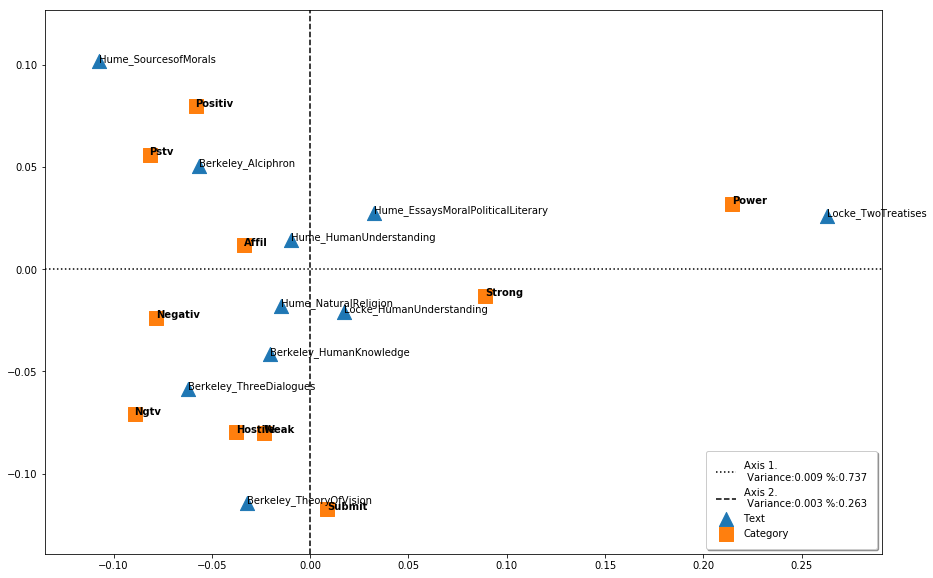

In [103]:
# I would really like to get the 3d representation to work!
# plt.figure().gca(projection='3d')

# Set the Author points to be represented by Triangles
plt.scatter(Authors_Score[0], Authors_Score[1], cmap='magma', s=200, marker = '^', label='Text')

# Set the Category points to be represented by Squares
plt.scatter(Category_Score[0], Category_Score[1], cmap='magma', s=200, marker = 's', label='Category')

# Set the size of the figure
plt.rcParams["figure.figsize"] = (15,10)

# Label each point for Author
for i, txt in enumerate(textName):
    plt.annotate(txt, (Authors_Score[0][i],Authors_Score[1][i]), fontsize = 10,)

# Label each point for Category
for i, txt in enumerate(categories[:10]):
    plt.annotate(txt, (Category_Score[0][i],Category_Score[1][i]), fontsize = 10, fontweight='bold')

# Draw axis
Axis1_Label= "Axis 1. \n Variance:" + str(format(Variance[0], '.3f')) + " %:" + str(format(Variance_total[0], '.3f'))
Axis2_Label= "Axis 2. \n Variance:" + str(format(Variance[1], '.3f')) + " %:" + str(format(Variance_total[1], '.3f'))
plt.axhline(0, color='black',linestyle=':', label=Axis1_Label)
plt.axvline(0, color='black',linestyle='--', label=Axis2_Label)

# Set Legend
plt.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)    

# Display Graph
plt.show()